In [6]:
import pandas as pd

# Cargar el archivo CSV con punto y coma como delimitador
df = pd.read_csv("/Users/sebastianrodriguez/Desktop/Proyecto3/Tolima.csv", delimiter=";")
df = df.drop("Unnamed: 8", axis = 1 )
df = df.drop("Unnamed: 9", axis = 1 )
df = df.drop("Unnamed: 10", axis = 1 )
df = df.drop("Unnamed: 11", axis = 1 )
df = df.drop("Unnamed: 12", axis = 1 )
df = df.drop("Unnamed: 13", axis = 1 )
df = df.drop("Unnamed: 14", axis = 1 )
df = df.drop("Unnamed: 15", axis = 1 )
# Guardar el DataFrame en un archivo CSV con coma como delimitador
df.to_csv("nuevo_archivo.csv", index=False)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 15: invalid continuation byte

In [50]:
import pandas as pd

# Try reading the CSV file with a different encoding
try:
    df = pd.read_csv("/Users/sebastianrodriguez/Desktop/Proyecto3/icfes.csv", delimiter=";", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("/Users/sebastianrodriguez/Desktop/Proyecto3/icfes.csv", delimiter=";", encoding='latin-1')

# Continue with the rest of your code
# ...

# Optionally, you can save the DataFrame to a new CSV file
df.to_csv("nuevo_archivo.csv", index=False)

In [52]:
import pandas as pd

df = pd.read_csv("/Users/sebastianrodriguez/Desktop/Proyecto3/nuevo_archivo.csv")
print(df.head())
print(df.describe())
print(df.columns)
import pandas as pd




   periodo  cole_area_ubicacion  cole_bilingue  estu_genero  \
0        4                    1              0            0   
1        4                    1              0            1   
2        4                    0              0            0   
3        4                    1              0            1   
4        4                    1              0            0   

   fami_estratovivienda  fami_tieneinternet  punt_ingles  punt_matematicas  \
0                     2                   0            3                 3   
1                     2                   1            3                 3   
2                     2                   1            3                 3   
3                     3                   1            3                 4   
4                     2                   1            3                 3   

   punt_sociales_ciudadanas  punt_c_naturales  punt_lectura_critica  \
0                         4                 3                     3   
1         

In [53]:
#por restriccion
from pgmpy.estimators import BicScore
from pgmpy.estimators import PC
scoring_method_bic = BicScore(data=df)
est = PC(data=df)

estimated_model = est.estimate(variant="stable", max_cond_vars=4)
print(estimated_model)
print(estimated_model.nodes())
print(estimated_model.edges())
print(scoring_method_bic.score(estimated_model))

Working for n conditional variables: 0:   0%|          | 0/4 [00:00<?, ?it/s]

Working for n conditional variables: 4: 100%|██████████| 4/4 [03:34<00:00, 53.65s/it]

DAG with 11 nodes and 28 edges
['punt_lectura_critica', 'punt_ingles', 'estu_genero', 'punt_c_naturales', 'cole_bilingue', 'punt_matematicas', 'punt_global', 'punt_sociales_ciudadanas', 'fami_tieneinternet', 'cole_area_ubicacion', 'fami_estratovivienda']
[('punt_lectura_critica', 'punt_ingles'), ('punt_lectura_critica', 'punt_c_naturales'), ('punt_lectura_critica', 'punt_matematicas'), ('punt_lectura_critica', 'fami_estratovivienda'), ('punt_ingles', 'fami_estratovivienda'), ('estu_genero', 'punt_c_naturales'), ('estu_genero', 'punt_matematicas'), ('estu_genero', 'fami_estratovivienda'), ('estu_genero', 'punt_ingles'), ('punt_c_naturales', 'punt_sociales_ciudadanas'), ('punt_c_naturales', 'punt_ingles'), ('cole_bilingue', 'punt_ingles'), ('cole_bilingue', 'cole_area_ubicacion'), ('cole_bilingue', 'fami_estratovivienda'), ('punt_matematicas', 'punt_ingles'), ('punt_global', 'punt_sociales_ciudadanas'), ('punt_global', 'punt_ingles'), ('punt_global', 'punt_c_naturales'), ('punt_global', 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/base/DAG.py:1196: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


In [19]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

estimated_model = BayesianNetwork(estimated_model)
estimated_model.fit(data=df, estimator = MaximumLikelihoodEstimator) 
for i in estimated_model.nodes():
    print(estimated_model.get_cpds(i))

NetworkXError: Input is not a correct NetworkX graph.

In [54]:
#por Hill climbing
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score

scoring_method = K2Score(data=df)
esth = HillClimbSearch(data=df)
estimated_modelh = esth.estimate(
    scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)
)
print(estimated_modelh)
print(estimated_modelh.nodes())
print(estimated_modelh.edges())

print(scoring_method_bic.score(estimated_modelh))

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 28/10000 [00:01<06:37, 25.09it/s]


DAG with 12 nodes and 27 edges
['periodo', 'cole_area_ubicacion', 'cole_bilingue', 'estu_genero', 'fami_estratovivienda', 'fami_tieneinternet', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']
[('cole_area_ubicacion', 'periodo'), ('cole_bilingue', 'cole_area_ubicacion'), ('fami_estratovivienda', 'fami_tieneinternet'), ('fami_estratovivienda', 'cole_area_ubicacion'), ('fami_tieneinternet', 'cole_area_ubicacion'), ('punt_ingles', 'punt_global'), ('punt_ingles', 'fami_estratovivienda'), ('punt_ingles', 'fami_tieneinternet'), ('punt_ingles', 'cole_area_ubicacion'), ('punt_ingles', 'estu_genero'), ('punt_matematicas', 'punt_global'), ('punt_matematicas', 'estu_genero'), ('punt_matematicas', 'punt_ingles'), ('punt_matematicas', 'punt_lectura_critica'), ('punt_sociales_ciudadanas', 'punt_lectura_critica'), ('punt_sociales_ciudadanas', 'punt_c_naturales'), ('punt_sociales_ciudadanas', 'punt_ingles'), ('punt_sociales_ciuda

In [55]:
#por puntaje bic
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianModel
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
scoring_method_bic = BicScore(data=df)

esth_bic = HillClimbSearch(data=df)

estimated_modelh_bic = esth_bic.estimate(scoring_method=scoring_method_bic, max_indegree=4, max_iter=int(1e4))

print(estimated_modelh_bic)
print(estimated_modelh_bic.nodes())
print(estimated_modelh_bic.edges())

# Imprime el puntaje BIC del modelo
print(scoring_method_bic.score(estimated_modelh_bic))

  0%|          | 18/10000 [00:01<09:51, 16.88it/s]

DAG with 12 nodes and 18 edges
['periodo', 'cole_area_ubicacion', 'cole_bilingue', 'estu_genero', 'fami_estratovivienda', 'fami_tieneinternet', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']
[('cole_area_ubicacion', 'fami_tieneinternet'), ('cole_area_ubicacion', 'periodo'), ('cole_area_ubicacion', 'cole_bilingue'), ('estu_genero', 'punt_matematicas'), ('fami_tieneinternet', 'fami_estratovivienda'), ('fami_tieneinternet', 'cole_bilingue'), ('punt_ingles', 'punt_global'), ('punt_ingles', 'cole_area_ubicacion'), ('punt_ingles', 'fami_tieneinternet'), ('punt_ingles', 'fami_estratovivienda'), ('punt_matematicas', 'punt_c_naturales'), ('punt_matematicas', 'punt_lectura_critica'), ('punt_sociales_ciudadanas', 'punt_ingles'), ('punt_c_naturales', 'punt_sociales_ciudadanas'), ('punt_c_naturales', 'punt_lectura_critica'), ('punt_c_naturales', 'punt_global'), ('punt_lectura_critica', 'punt_sociales_ciudadanas'), ('punt_lec

In [56]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, K2Score, ExhaustiveSearch, PC


# Hill Climbing with BIC Score
scoring_method_bic = BicScore(data=df)
est_hill_bic = HillClimbSearch(data=df)
model_hill_bic = est_hill_bic.estimate(scoring_method=scoring_method_bic, max_indegree=4, max_iter=int(1e5))

# Hill Climbing with K2 Score
scoring_method_k2 = K2Score(data=df)
est_hill_k2 = HillClimbSearch(data=df)
model_hill_k2 = est_hill_k2.estimate(scoring_method=scoring_method_k2, max_indegree=4, max_iter=int(1e5))


# Constraint-based (PC Algorithm)
est_pc = PC(data=df)
model_pc = est_pc.estimate()



# Print or further analyze the learned models
print("Hill Climbing with BIC Score:")
print(model_hill_bic.edges())
print(scoring_method_bic.score(estimated_modelh_bic))

print("\nHill Climbing with K2 Score:")
print(model_hill_k2.edges())
print(scoring_method_bic.score(model_hill_k2))



print("\nPC Algorithm:")
print(model_pc.edges())
print(scoring_method_bic.score(model_pc))




  0%|          | 0/100000 [00:00<?, ?it/s]

Working for n conditional variables: 5: 100%|██████████| 5/5 [06:20<00:00, 76.12s/it]

Hill Climbing with BIC Score:
[('cole_area_ubicacion', 'fami_tieneinternet'), ('cole_area_ubicacion', 'periodo'), ('cole_area_ubicacion', 'cole_bilingue'), ('estu_genero', 'punt_matematicas'), ('fami_tieneinternet', 'fami_estratovivienda'), ('fami_tieneinternet', 'cole_bilingue'), ('punt_ingles', 'punt_global'), ('punt_ingles', 'cole_area_ubicacion'), ('punt_ingles', 'fami_tieneinternet'), ('punt_ingles', 'fami_estratovivienda'), ('punt_matematicas', 'punt_c_naturales'), ('punt_matematicas', 'punt_lectura_critica'), ('punt_sociales_ciudadanas', 'punt_ingles'), ('punt_c_naturales', 'punt_sociales_ciudadanas'), ('punt_c_naturales', 'punt_lectura_critica'), ('punt_c_naturales', 'punt_global'), ('punt_lectura_critica', 'punt_sociales_ciudadanas'), ('punt_lectura_critica', 'punt_ingles')]
-172945.0100474317

Hill Climbing with K2 Score:
[('cole_area_ubicacion', 'periodo'), ('cole_bilingue', 'cole_area_ubicacion'), ('fami_estratovivienda', 'fami_tieneinternet'), ('fami_estratovivienda', 'col


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/base/DAG.py:1196: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


  0%|          | 18/10000 [00:01<10:47, 15.42it/s] 
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


DAG with 12 nodes and 18 edges
['periodo', 'cole_area_ubicacion', 'cole_bilingue', 'estu_genero', 'fami_estratovivienda', 'fami_tieneinternet', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']
[('cole_area_ubicacion', 'fami_tieneinternet'), ('cole_area_ubicacion', 'periodo'), ('cole_area_ubicacion', 'cole_bilingue'), ('estu_genero', 'punt_matematicas'), ('fami_tieneinternet', 'fami_estratovivienda'), ('fami_tieneinternet', 'cole_bilingue'), ('punt_ingles', 'punt_global'), ('punt_ingles', 'cole_area_ubicacion'), ('punt_ingles', 'fami_tieneinternet'), ('punt_ingles', 'fami_estratovivienda'), ('punt_matematicas', 'punt_c_naturales'), ('punt_matematicas', 'punt_lectura_critica'), ('punt_sociales_ciudadanas', 'punt_ingles'), ('punt_c_naturales', 'punt_sociales_ciudadanas'), ('punt_c_naturales', 'punt_lectura_critica'), ('punt_c_naturales', 'punt_global'), ('punt_lectura_critica', 'punt_sociales_ciudadanas'), ('punt_lec

  0%|          | 0/1170 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
  1%|▏         | 16/1170 [00:05<07:05,  2.71it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/Bayes

Exactitud del modelo: 0.9824595595400507
Verdaderos Positivos:  5003
Falsos Positivos:  17
Verdaderos Negativos:  38
Falsos Negativos:  73
Matriz de confusión:
[[5003   17]
 [  73   38]]
Valor F1: 0.9795495772582189
Exhaustividad (Recall): 0.9824595595400507


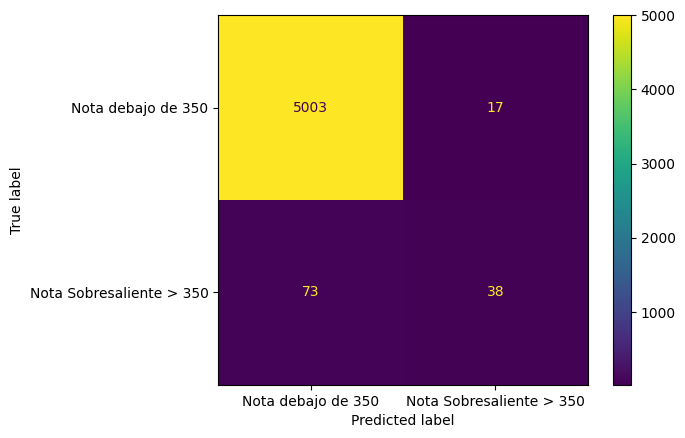

In [60]:
#por puntaje bic
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianModel
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
scoring_method_bic = BicScore(data=df)

esth_bic = HillClimbSearch(data=df)

estimated_modelh_bic = esth_bic.estimate(scoring_method=scoring_method_bic, max_indegree=4, max_iter=int(1e4))

print(estimated_modelh_bic)
print(estimated_modelh_bic.nodes())
print(estimated_modelh_bic.edges())
df = df.dropna()  # Drop rows with NaN values
df = df.reset_index(drop=True)  # Reset index to integers

# Imprime el puntaje BIC del modelo
print(scoring_method_bic.score(estimated_modelh_bic))
modelo = BayesianModel([('cole_area_ubicacion', 'fami_tieneinternet'), ('cole_area_ubicacion', 'periodo'), ('cole_area_ubicacion', 'cole_bilingue'), ('estu_genero', 'punt_matematicas'), ('fami_tieneinternet', 'fami_estratovivienda'), ('fami_tieneinternet', 'cole_bilingue'), ('punt_ingles', 'punt_global'), ('punt_ingles', 'cole_area_ubicacion'), ('punt_ingles', 'fami_tieneinternet'), ('punt_ingles', 'fami_estratovivienda'), ('punt_matematicas', 'punt_c_naturales'), ('punt_matematicas', 'punt_lectura_critica'), ('punt_sociales_ciudadanas', 'punt_ingles'), ('punt_c_naturales', 'punt_sociales_ciudadanas'), ('punt_c_naturales', 'punt_lectura_critica'), ('punt_c_naturales', 'punt_global'), ('punt_lectura_critica', 'punt_sociales_ciudadanas'), ('punt_lectura_critica', 'punt_ingles')]
)
print(scoring_method_bic.score(modelo))
from sklearn.model_selection import train_test_split
# Dividir los datos
# X crea un dataframe que contiene todas la columnas menos 'Puntaje_Global'. Es decir, las caracteristicas que utilizara para hacer predicciones
X = df.drop(columns=['punt_global'])
# Y crea una serie que contiene solo la columna "Puntaje_Global". 
y = df['punt_global']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


#Codigo utilizado para combrobar mediante un metodo de regresion lineal
#from sklearn.linear_model import LogisticRegression
#modelo = LogisticRegression()
#modelo.fit(X_train, y_train)


from pgmpy.estimators import MaximumLikelihoodEstimator
emv = MaximumLikelihoodEstimator(modelo , data = df)

# Estimar para nodos sin padres


cpdem_grade1 = emv.estimate_cpd(node="cole_bilingue")
print("CPDs cole_bilingue")
print(cpdem_grade1)



# Estimar para nodo Target
cpdem_target = emv.estimate_cpd(node="punt_global")
print("CPDs del modelo para Target")
print(cpdem_target)

modelo.fit(data=df , estimator = MaximumLikelihoodEstimator )
for i in modelo.nodes():
    print(modelo.get_cpds(i))

#################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

#Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", exactitud)

#Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Verdaderos Positivos: ", confusion[0][0])
print("Falsos Positivos: ", confusion[0][1])
print("Verdaderos Negativos: ", confusion[1][1])
print("Falsos Negativos: ", confusion[1][0])

clas= ['Nota debajo de 350', 'Nota Sobresaliente > 350']
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=clas)
disp.plot() 

f1 = f1_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted') 

print(f'Valor F1: {f1}')
print(f'Exhaustividad (Recall): {recall}')




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


-16566.520894778525
-21682.463855749957
[('Gender', 'Scholarship holder'), ('Scholarship holder', 'Debtor'), ('Scholarship holder', 'Target'), ('Debtor', 'Target'), ('Curricular units 2nd sem (grade)', 'Target'), ('Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)'), ('Curricular units 2nd sem (approved)', 'Target'), ('Curricular units 1st sem (grade)', 'Target'), ('Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)'), ('Curricular units 1st sem (approved)', 'Target')]
CPDs del modelo para Gender
+-----------+----------+
| Gender(0) | 0.655923 |
+-----------+----------+
| Gender(1) | 0.344077 |
+-----------+----------+
CPDs del modelo para Curricular units 1st sem (grade)
+-------------------------------------+-----------+
| Curricular units 1st sem (grade)(0) | 0.178237  |
+-------------------------------------+-----------+
| Curricular units 1st sem (grade)(1) | 0.0168044 |
+-------------------------------------+-----------+
| Curricular uni

100%|██████████| 87/87 [00:00<00:00, 1379.22it/s]


Exactitud del modelo: 0.8264462809917356
Verdaderos Positivos:  178
Falsos Positivos:  101
Verdaderos Negativos:  422
Falsos Negativos:  25
Matriz de confusión:
[[178 101]
 [ 25 422]]
Valor F1: 0.8195626343191743
Exhaustividad (Recall): 0.8264462809917356


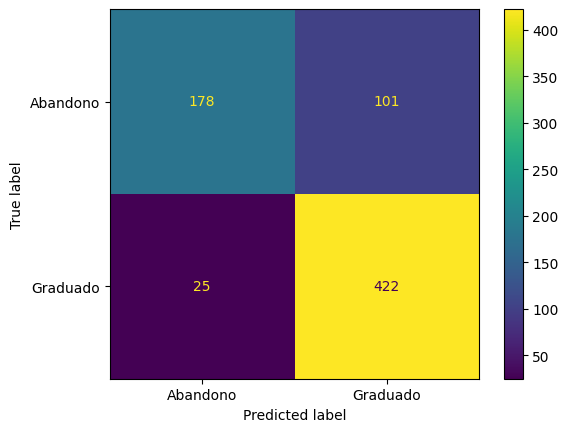

In [39]:
# modelo actual
from pgmpy.models import BayesianModel
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
modelo = BayesianModel([
('Gender', 'Scholarship holder'),   ('Scholarship holder', 'Debtor'),   ('Scholarship holder', 'Target'),
('Curricular units 2nd sem (grade)', 'Target'),  ('Curricular units 2nd sem (approved)', 'Target'),   ('Curricular units 1st sem (grade)', 'Target'),
('Curricular units 1st sem (approved)', 'Target'),  ('Debtor', 'Target'),  ('Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (approved)'),
('Curricular units 1st sem (grade)', 'Curricular units 1st sem (approved)')
])
print(scoring_method.score(modelo))
print(scoring_method_bic.score(modelo))

print(modelo.edges())


from sklearn.model_selection import train_test_split
# Dividir los datos
# X crea un dataframe que contiene todas la columnas menos 'target'. Es decir, las caracteristicas que utilizara para hacer predicciones
X = df.drop(columns=['Target'])
# Y crea una serie que contiene solo la columna "Target". 
y = df['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


#Codigo utilizado para combrobar mediante un metodo de regresion lineal
#from sklearn.linear_model import LogisticRegression
#modelo = LogisticRegression()
#modelo.fit(X_train, y_train)


from pgmpy.estimators import MaximumLikelihoodEstimator
emv = MaximumLikelihoodEstimator(modelo , data = df)

# Estimar para nodos sin padres
cpdem_gender = emv.estimate_cpd(node="Gender") 
print("CPDs del modelo para Gender")
print(cpdem_gender)

cpdem_grade1 = emv.estimate_cpd(node="Curricular units 1st sem (grade)")
print("CPDs del modelo para Curricular units 1st sem (grade)")
print(cpdem_grade1)

cpdem_grade2 = emv.estimate_cpd(node="Curricular units 2nd sem (grade)")
print("CPDs del modelo para Curricular units 2nd sem (grade)")
print(cpdem_grade2)

# Estimar para nodo Target
cpdem_target = emv.estimate_cpd(node="Target")
print("CPDs del modelo para Target")
print(cpdem_target)

modelo.fit(data=df , estimator = MaximumLikelihoodEstimator )
for i in modelo.nodes():
    print(modelo.get_cpds(i))

#################
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Realizar predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

#Calcular la exactitud del modelo
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", exactitud)

#Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Verdaderos Positivos: ", confusion[0][0])
print("Falsos Positivos: ", confusion[0][1])
print("Verdaderos Negativos: ", confusion[1][1])
print("Falsos Negativos: ", confusion[1][0])
clas= ['Abandono', 'Graduado']
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=clas)
disp.plot() 

f1 = f1_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted') 

print(f'Valor F1: {f1}')
print(f'Exhaustividad (Recall): {recall}')